In [1]:
#using Pkg; Pkg.add(PackageSpec(url="https://github.com/itscoe/SpectraFit.jl", rev="master"))

In [2]:
using SpectraFit, Plots, DataFrames

┌ Info: Precompiling SpectraFit [1789dd9f-0c89-4092-96fe-8660666f4b70]
└ @ Base loading.jl:1260


In [3]:
experimental = get_experimental(get_data("30 envelope.csv"))

187×2 Array{Float64,2}:
 -3816.18         2.82427e6
 -3725.23         2.97794e6
 -3653.96         2.59856e6
 -3554.63         2.75628e6
 -3437.43         3.10908e6
 -3418.11         4.70798e6
 -3398.79         4.75379e6
 -3379.65         4.82229e6
 -3360.15         5.95238e6
 -3341.19         7.71148e6
 -3322.05         7.47253e6
 -3302.55         9.12197e6
 -3283.41         1.09083e7
     ⋮       
  -172.266        5.07071e6
  -153.128        5.06373e6
  -133.99         4.94116e6
  -114.852        5.26028e6
   -95.5313       4.59471e6
   -76.2108       4.51288e6
   -56.8903       4.20556e6
   -37.7521       4.67123e6
   -18.4316       4.40853e6
     0.8889       1.2385e6
    95.4864  628655.0
   345.924        1.60631e6

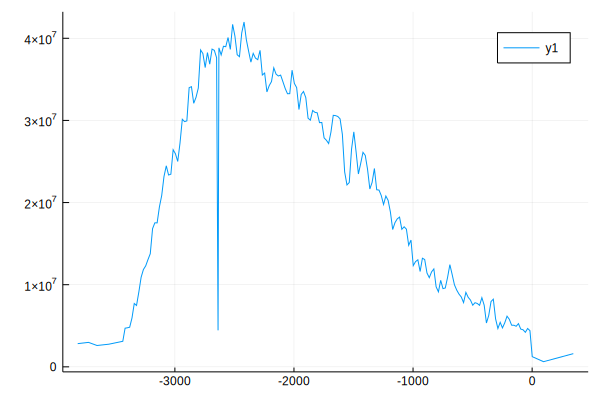

In [4]:
plot(experimental[:, 1], experimental[:, 2])

In [ ]:
result = SpectraFit.fit_chemical_shift(experimental)

In [6]:
result.minimizer

6-element Array{Float64,1}:
  727.8317089805207
  -44.585946386546425
 -254.86482761367512
   24.24855048583754
    0.9428736320347939
    0.22430254585104126

In [7]:
function results_table(minimizer)
    df = DataFrame(["σᵢₛₒ" minimizer[1] max(minimizer[2], 0)
                    "Δσ" minimizer[3] max(minimizer[4], 0)
                    "ησ" clamp(minimizer[5], 0, 1) max(minimizer[6], 0)])
    colnames = ["Parameter","Mean","St. Dev."]
    rename!(df, Symbol.(colnames))
    return df
end
results_table(result.minimizer)

,Parameter,Mean,St. Dev.
,Any,Any,Any
1,σᵢₛₒ,727.832,0.0
2,Δσ,-254.865,24.2486
3,ησ,0.942874,0.224303


In [8]:
SpectraFit.plot_experimental(experimental, unit = "ppm")

In [9]:
SpectraFit.plot_theoretical(experimental, SpectraFit.chemical_shift_params(result.minimizer), unit = "ppm")